??? danger Vous êtes professeur ? Cliquez ici pour obtenir les ressources associées à ce notebook 
  
Ce notebook est conçu pour être utilisé avec des ressources (diaporama, fiche d'exercice et vidéo).

Retrouvez-les dans l'espace professeur du site [mathadata.fr](https://mathadata.fr/fr).

Pour tout retour, coquille, demande d'aide, critique, ou félicitations, contactez-nous sur [question-notebook@mathadata.fr](mailto:question-notebook@mathadata.fr).

Notebook exporté le 13-02-2026 18:38:37 
<!-- depuis le commit c798ed5 -->

???


# MathAData - Géométrie du plan, équation réduite


!!! abstract Défi : reconnaissance d’images de chiffres manuscripts
Au cours de ce TP tu vas développer un algorithme d'intelligence artificielle qui estime le chiffre écrit dans  une image. Ce genre d'algorithme sert par exemple à lire automatiquement les adresses pour trier les colis à la poste. 

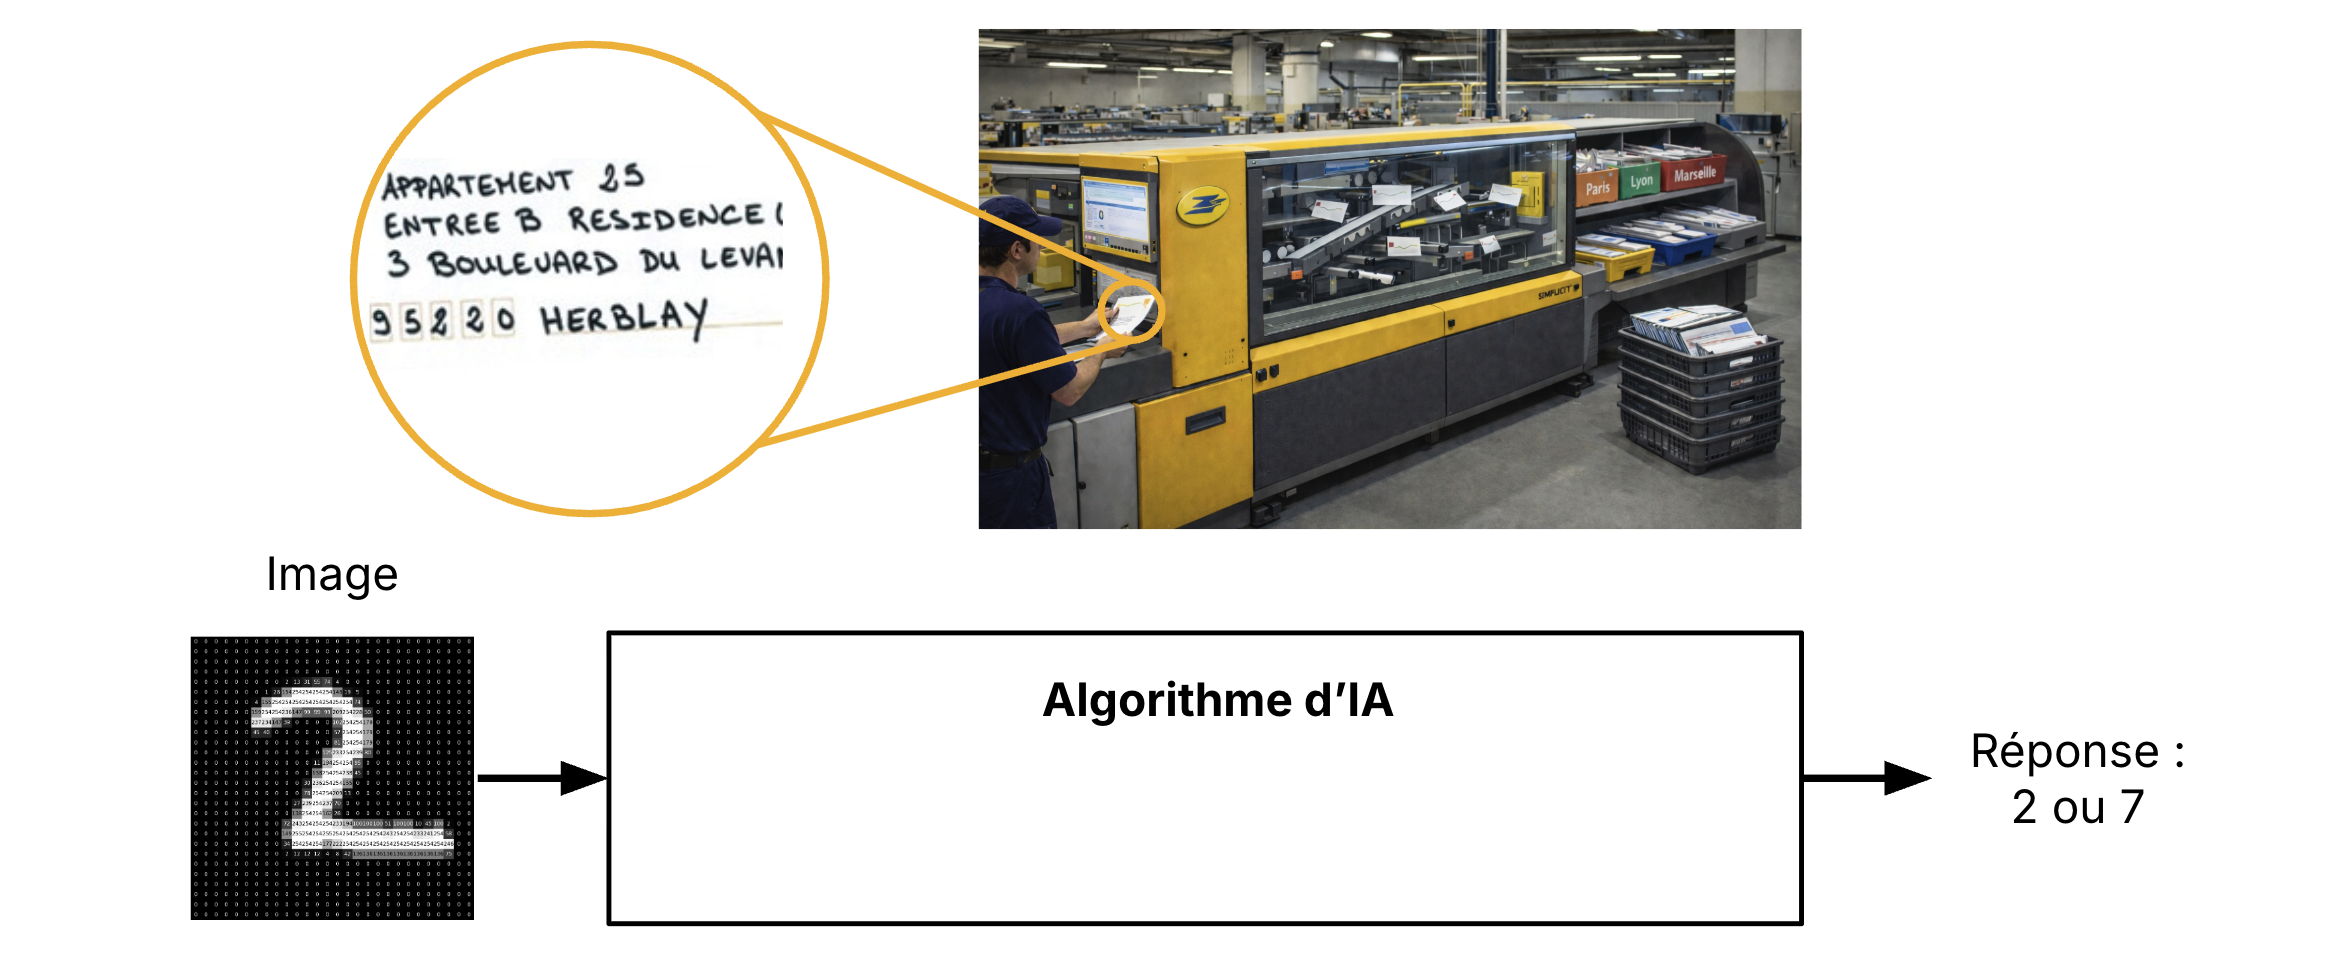  

!!!


<div id="debut-etape-intro" style="height: 1px; visibility: hidden;"></div>


!!! tip Exécuter une cellule  
Pour commencer, **clique dans la cellule** de code ci-dessous puis appuie dans la barre d'outils sur le bouton **Exécuter**
 <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">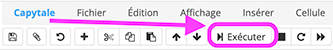</span>
ou sur les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été exécuté, une étoile apparaîtra le temps du chargement puis un nombre entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!


??? warning SOS : Rien ne se passe ? Clique ici  

### Rien ne se passe quand tu exécutes une cellule ?

**Cas 1 : La cellule n'a pas été exécutée.**  
Tu vois ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">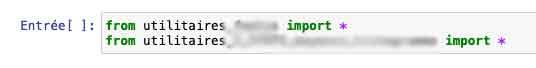</span>

**Solution :** Clique dans la cellule (sur le mot `from` par exemple) puis appuie sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">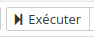</span>

---

**Cas 2 : La cellule est en cours d'exécution.**  
Tu vois ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">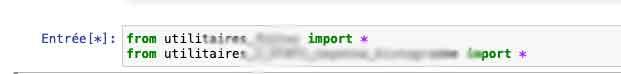</span>

**Solution :** La base de données se charge. Patiente jusqu'à une minute.

---

**Cas 3 : Rien ne fonctionne malgré les solutions ci-dessus ?**  

**Solution :** Relance le notebook depuis le début :

1. Clique sur le bouton **deux petites flèches** <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">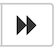</span> dans la barre d'outils en haut du notebook


2. Clique ensuite sur le bouton rouge **"Relancer et exécuter toutes les cellules"**
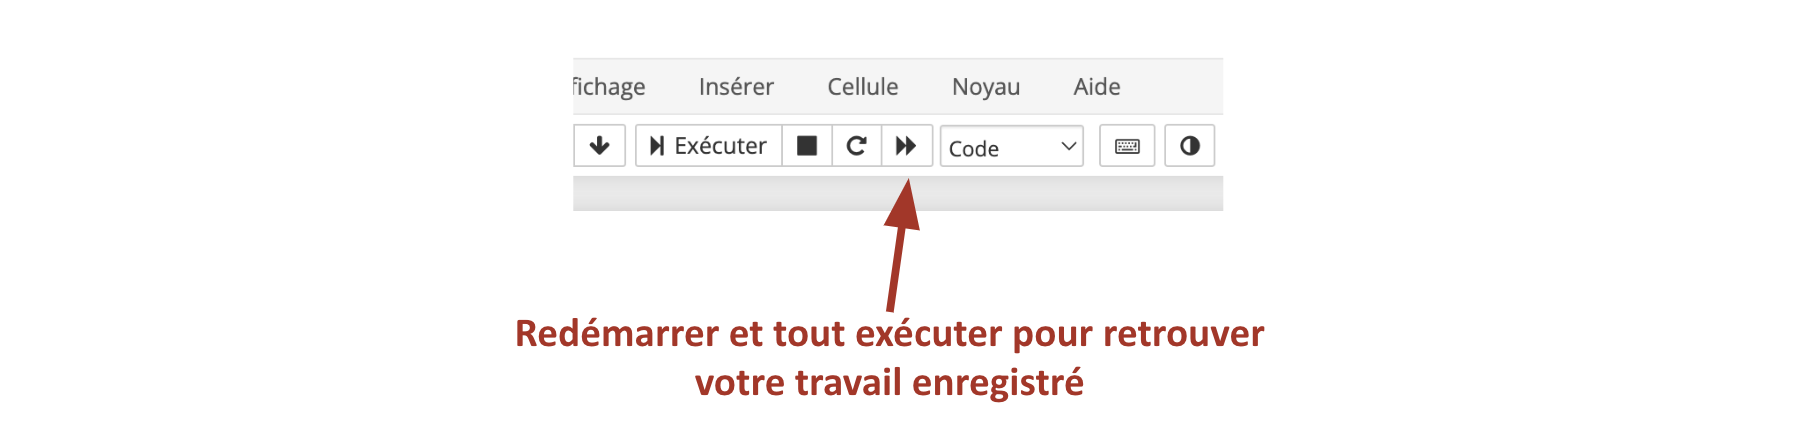  

???


In [ ]:
# Clique dans cette cellule de code puis appuie sur le bouton Exécuter dans la barre d'outils 

from utilitaires_mnist import *
from utilitaires_S_GEO_equation_reduite import *

<div id="debut-etape-data" style="height: 1px; visibility: hidden;"></div>


## A. Images numériques


!!! abstract Qu'est-ce qu'une image numérique ?  
C’est un tableau de nombres qui donnent le niveau de gris de chaque pixel de l’image. Un pixel noir vaut 0, un pixel blanc vaut 255, et pour un gris est une valeur intermédiaire. 

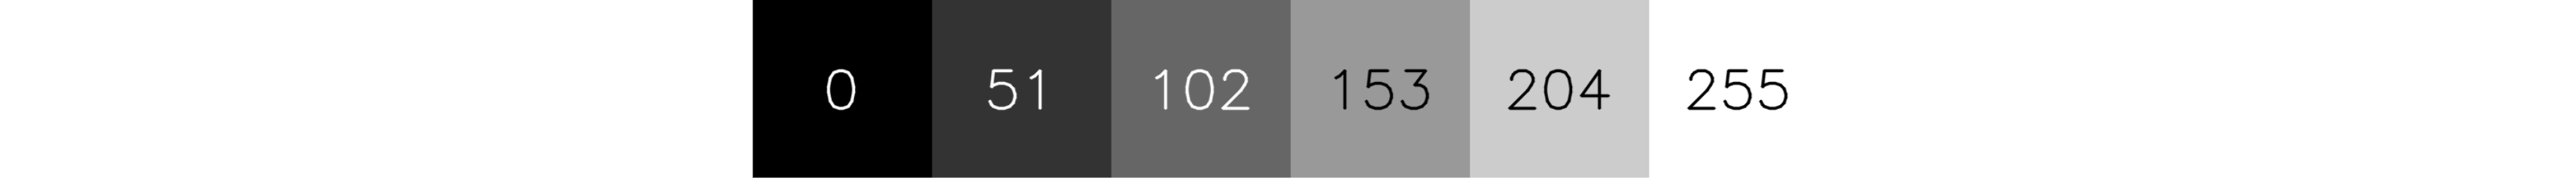  
**Exécute la cellule suivante pour voir un exemple d'image.**  
!!!


In [ ]:
affichage_image_et_pixels()
question_pixel()

## B. Étape 1 : Points caractéristiques dans le plan


<div id="debut-etape-carac" style="height: 1px; visibility: hidden;"></div>


!!! tip Nombres caractéristiques
Pour  différentier les images de 2 et de 7 on va utiliser une caractéristique $x$. C'est un nombre calculé à partir des pixels de l’image **qui prend des valeurs différentes selon que l’image est un 2 ou un un 7**. 

Par exemple, on va calculer **la moyenne des pixels dans un rectangle**. On choisit un rectangle où les valeurs des images des 2 et des 7 sont généralement différentes. Voici un exemple : 

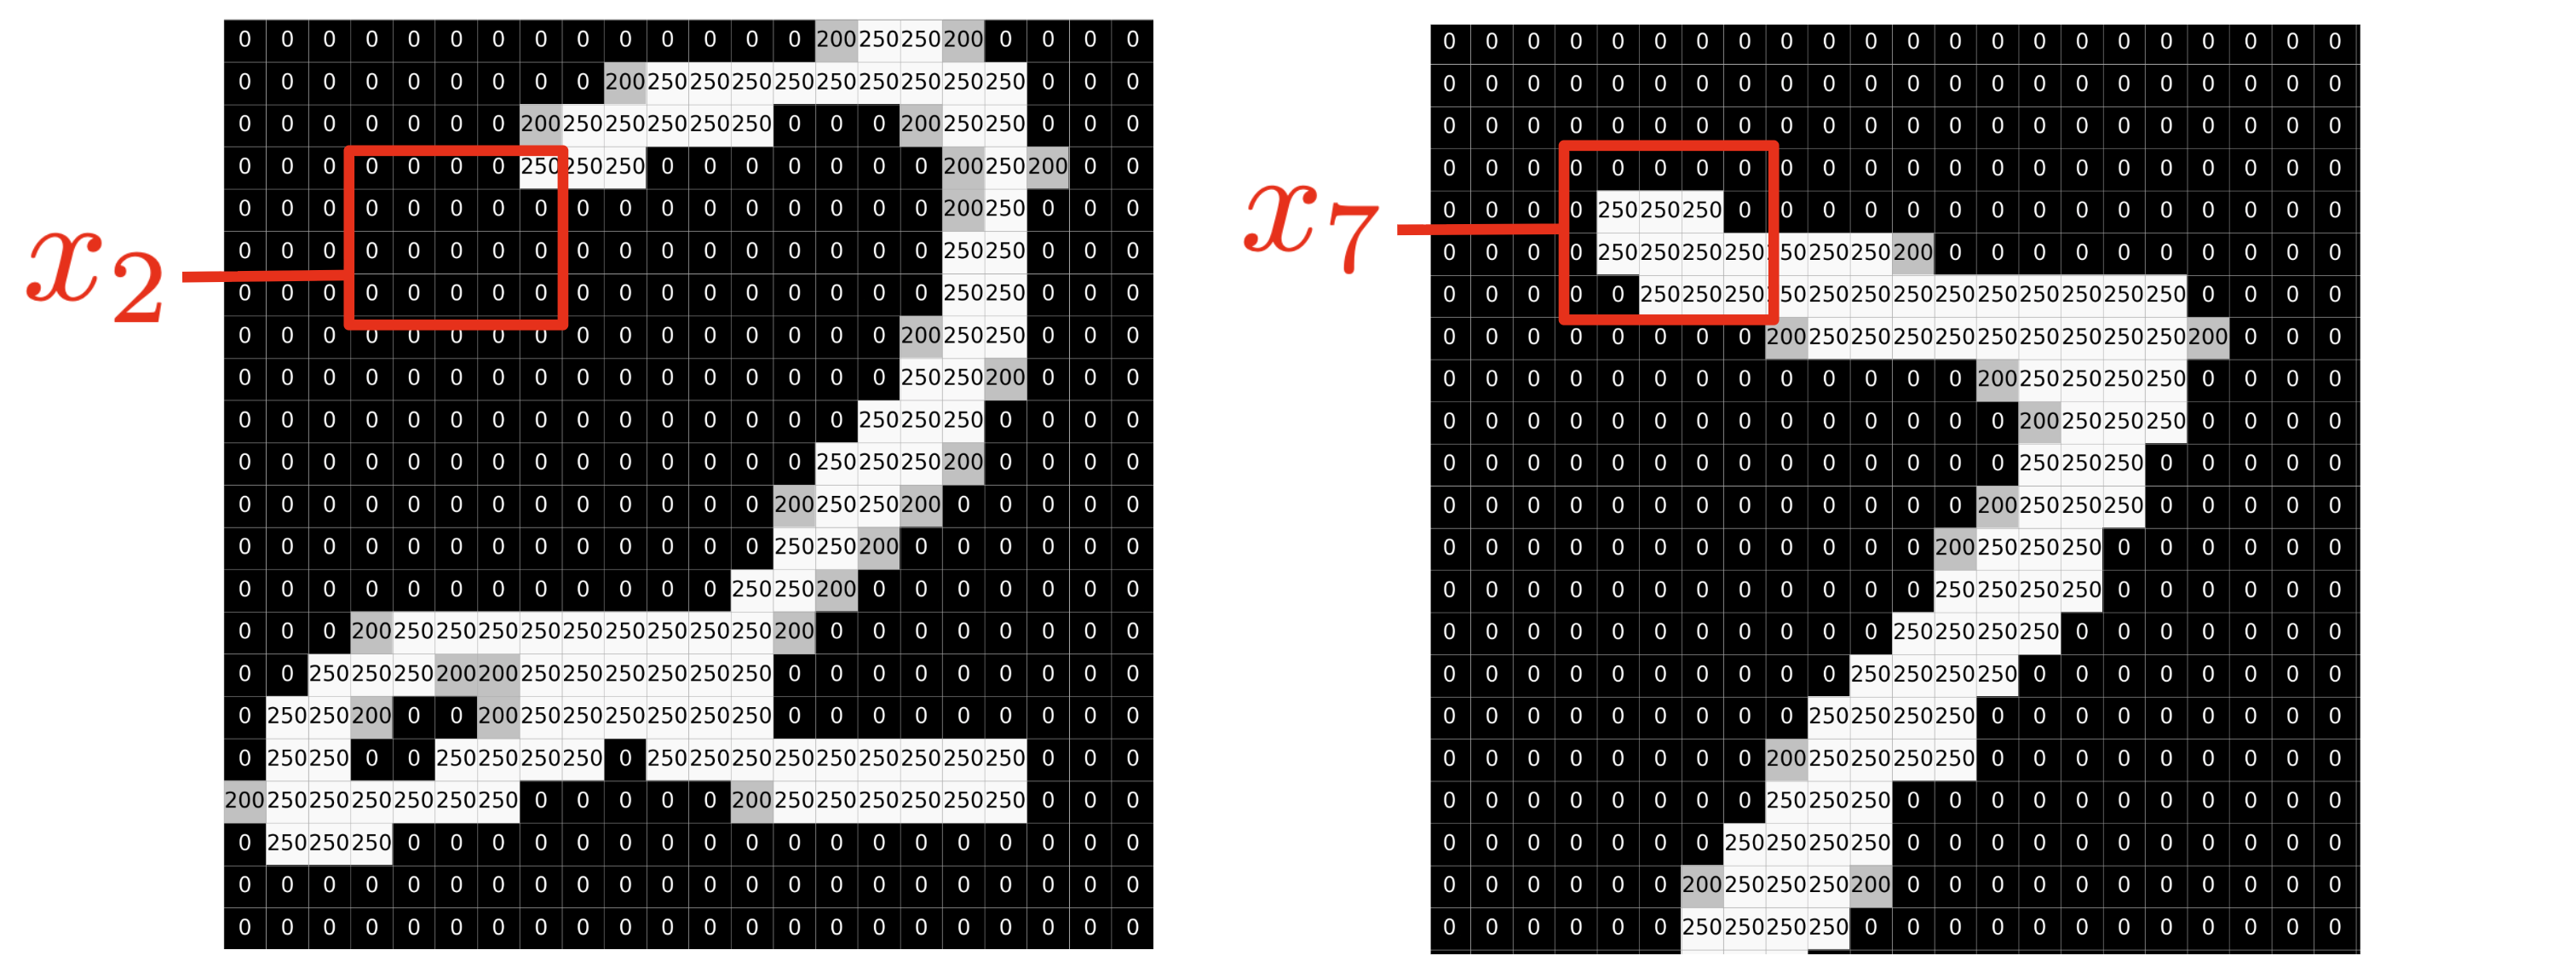
!!!


#### TODO : zoom sur les rectangles pour faciliter comptage pixels


!!! question 1) Calcule la caractéristique de ces deux images

Caractéristique de l'image de 2 ci-dessus : $x_2 = \frac{1 \times 250}{25} = 10$. 

De même, calcule la caractéristiques du 7 : $x_7 = \text{moyenne pixels rectangle rouge}$


**Efface les `...`** dans la cellule, écris ta réponse à la place, **puis exécute**.
!!!


In [ ]:
# Efface les ... et écrits à la place ta réponse

x_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_carac_x()

In [ ]:
# TODO : coder le QCM
#  question : quelle image a la plus grande caractéristique x ?
#  option 1 "l'image de 2"
#  option 2 "l'image de 7"

qcm_1_cara_mnist()

!!! warning Une caractéristique ne suffit pas toujours
On découvre une image de 2 écrite d'une nouvelle façon (3e image) :
    
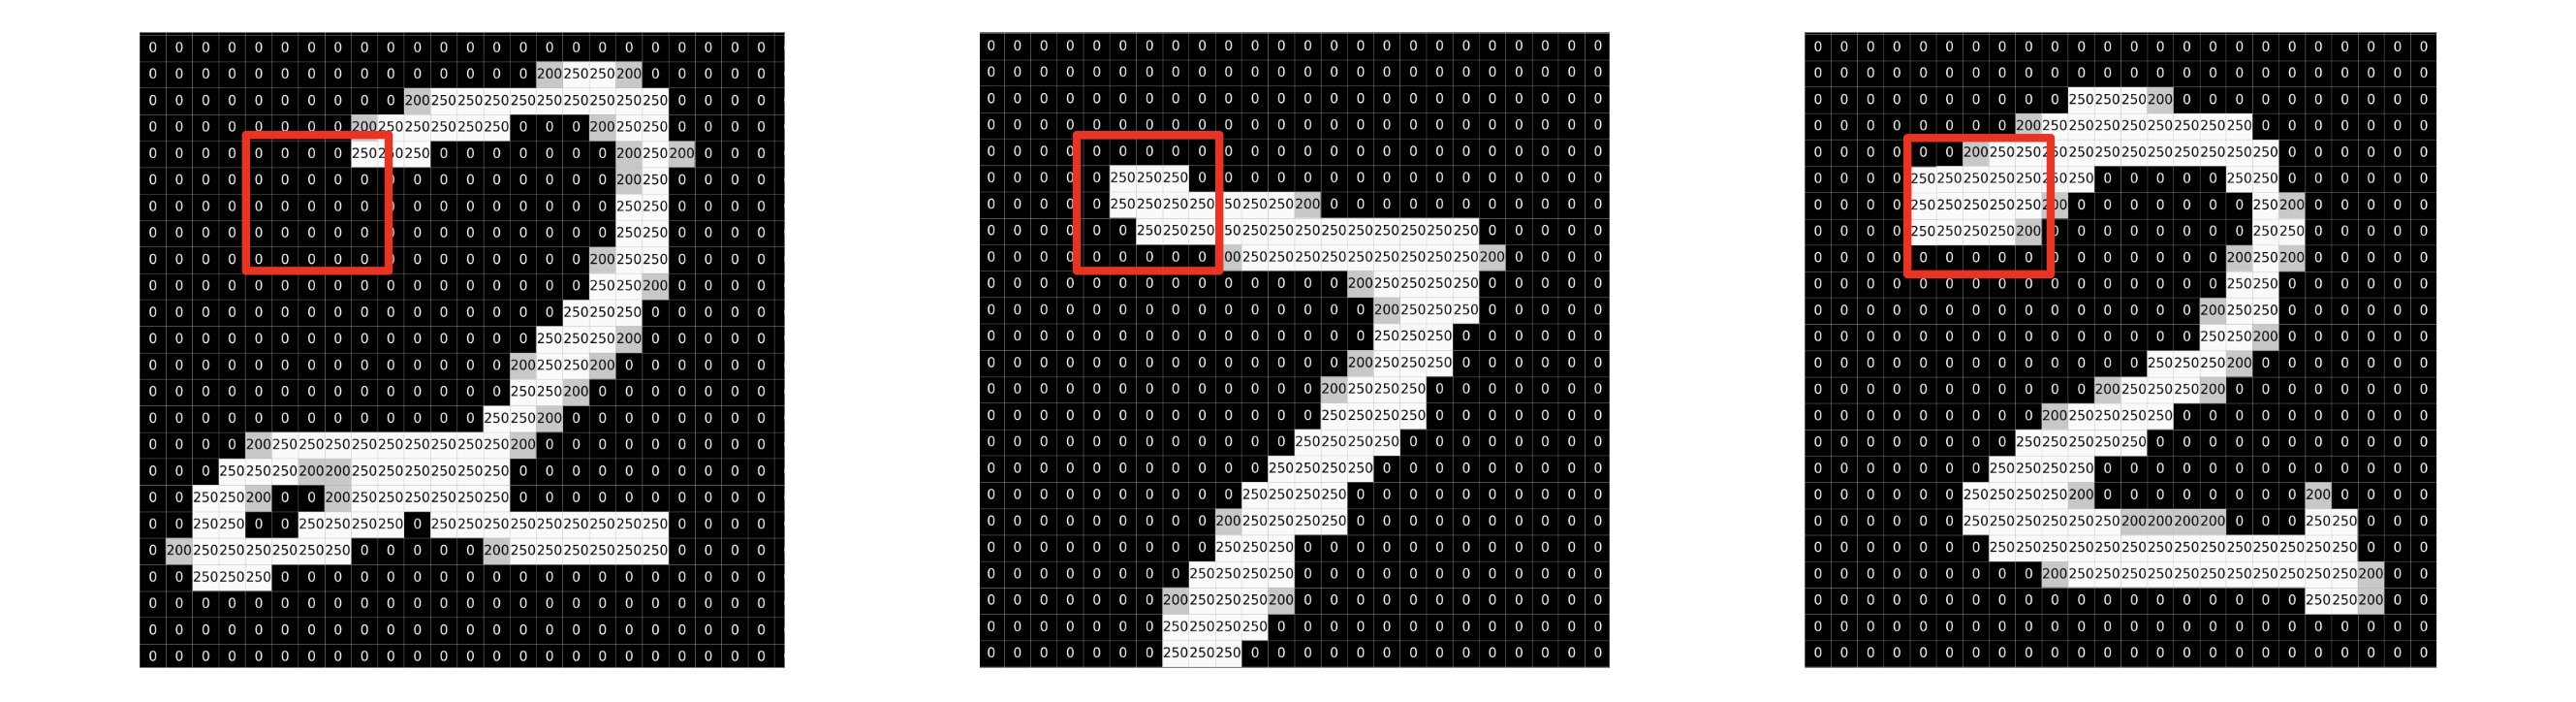
!!!


In [ ]:
# TODO : coder le QCM
#  question : pour la 3e image ci-dessus, le rectangle rouge contient...
#  option 1 "moins de pixels blancs que sur l'image de 7, la caractéristique sera donc plus petite"
#  option 2 "plus de pixels blancs que sur l'image de 7, la caractéristique sera donc plus grande"

qcm_contre_exemple_mnist()

!!! tip Utiliser une deuxième caractéristique
Pour avoir plus d'information sur l'image, on va calculer une deuxième caracterististique $y$. C'est la moyenne des pixels dans un autre rectangle, en bleu cette fois-ci. À la fin du TP ce sera a vous de chercher des meilleures rectangles.

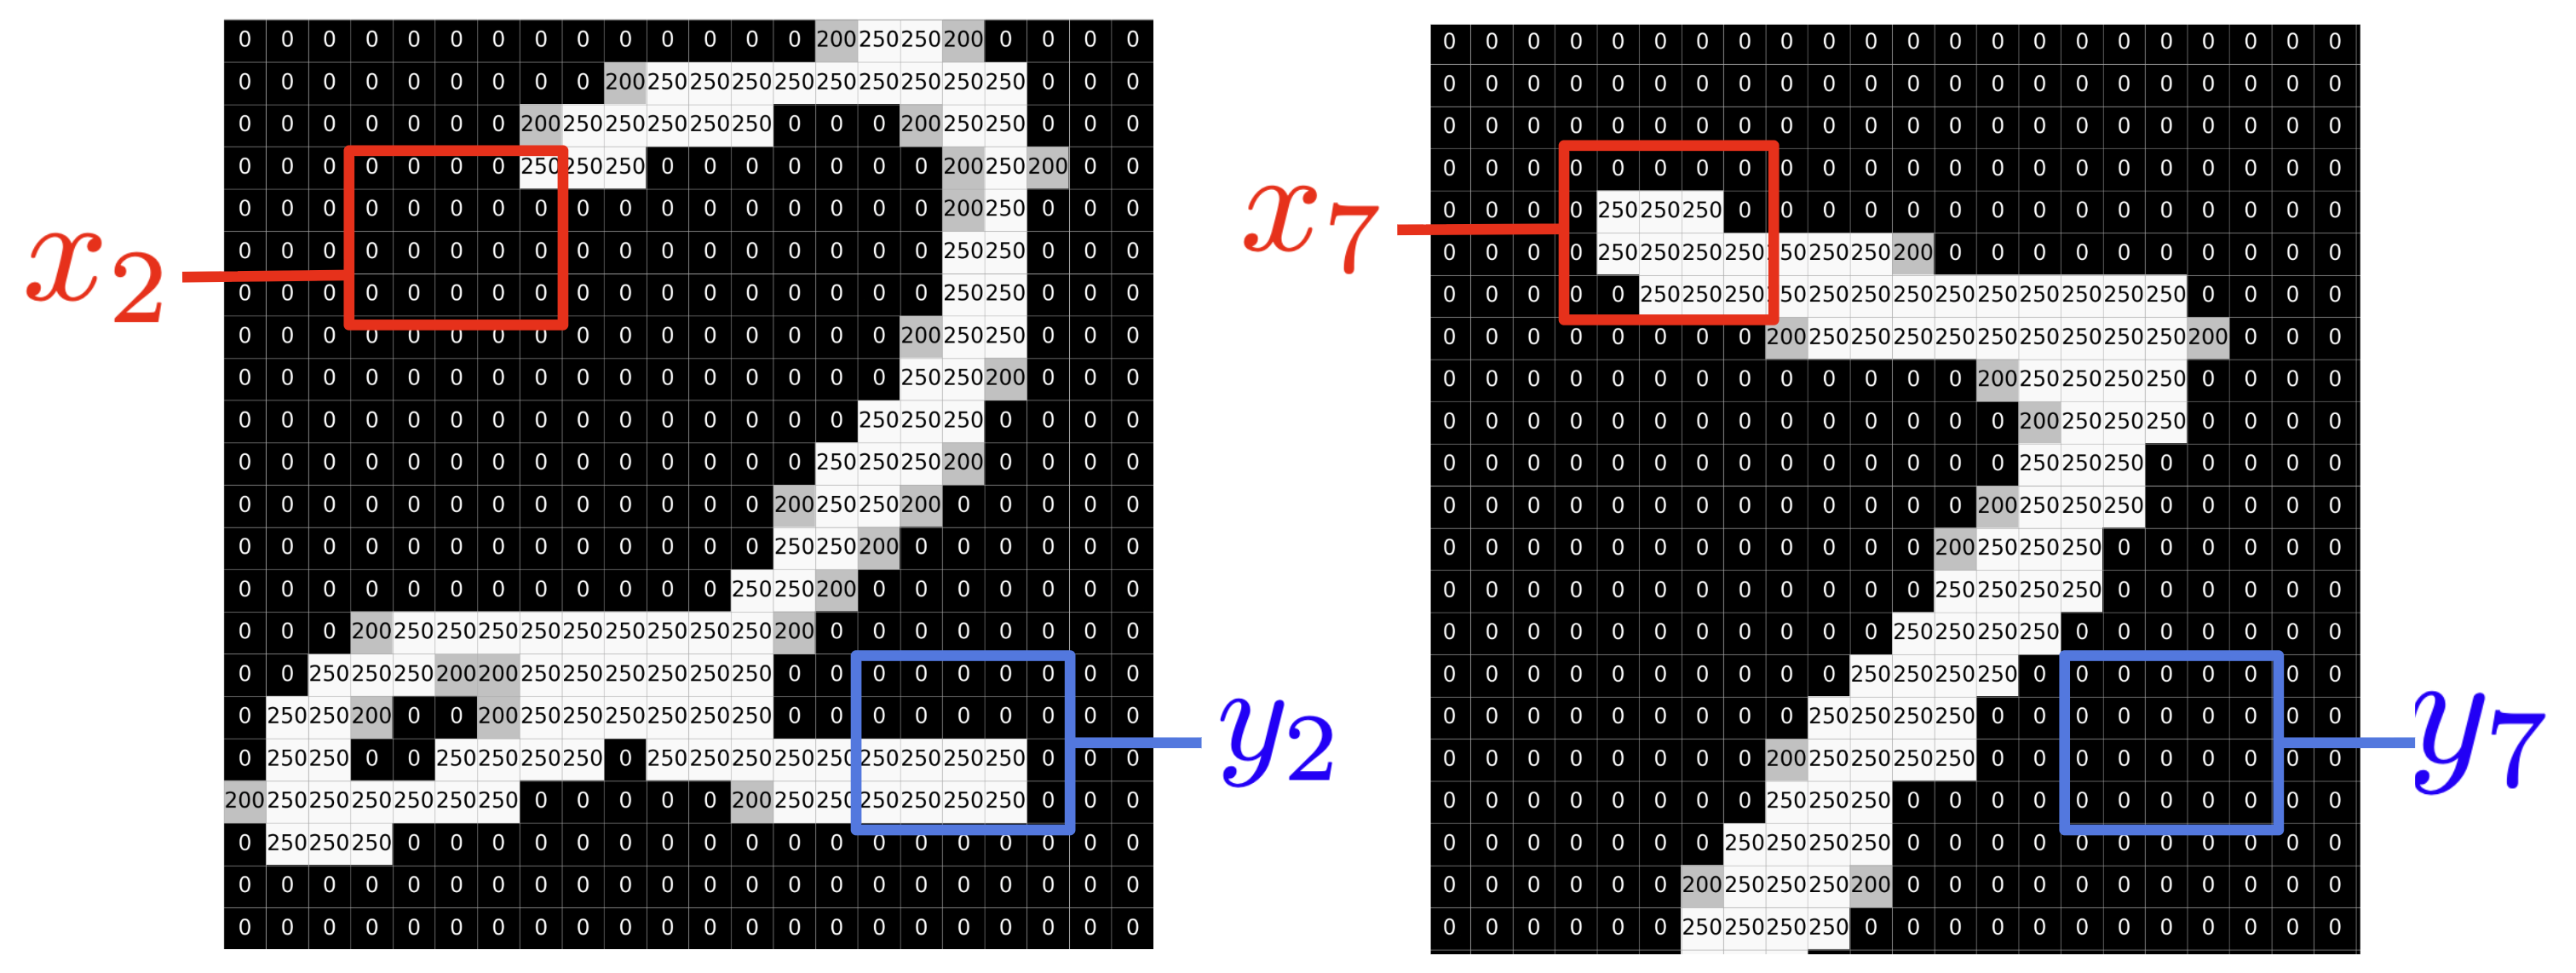
!!!


!!! question 2) Calcule la caractéristique $y$ de ces deux images

2e caractéristique de l'image de 2 ci-dessus : $y_2 = \frac{1 \times 250}{25} = 100$. 

De même, calcule la 2e caractéristiques du 7 : $y_7 = \text{moyenne pixels rectangle bleu}$

Note : Pense à enregistrer régulièrement en cliquant sur <button class='fa fa-save icon-save btn btn-xs btn-default'></button> pour ne pas perdre ton travail.

**Efface les `...`** dans la cellule, écris ta réponse à la place, **puis exécute**.
!!!


In [ ]:
# Efface les ... et écrits à la place ta réponse

y_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_carac_y()

!!! info Les deux caractéristiques de références
À partir de maitenant pour toutes les images on prend comme caractéristique de référence les moyennes sur les deux rectangles rouges et bleu. 

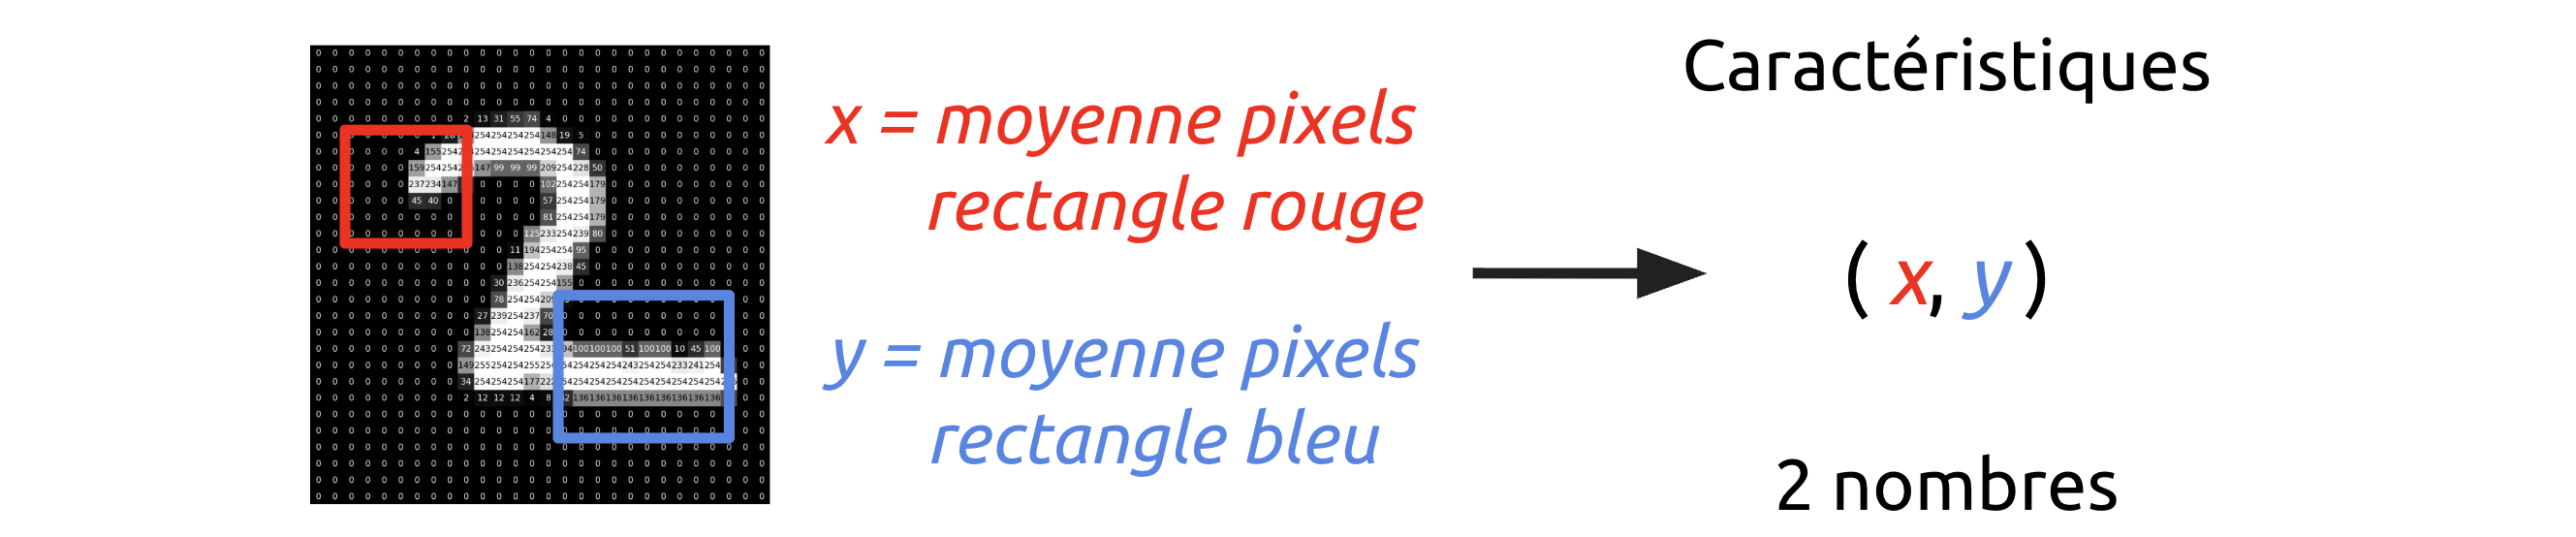

À la fin de ce TP tu vas chercher des rectangles qui différencient encore mieux les images ! 
!!!


### Représentation dans le plan


!!! tip Représenter une image par son point caractéristique
Chaque image est représentée par un point caractéristique de coordonnées $(x ; y)$.

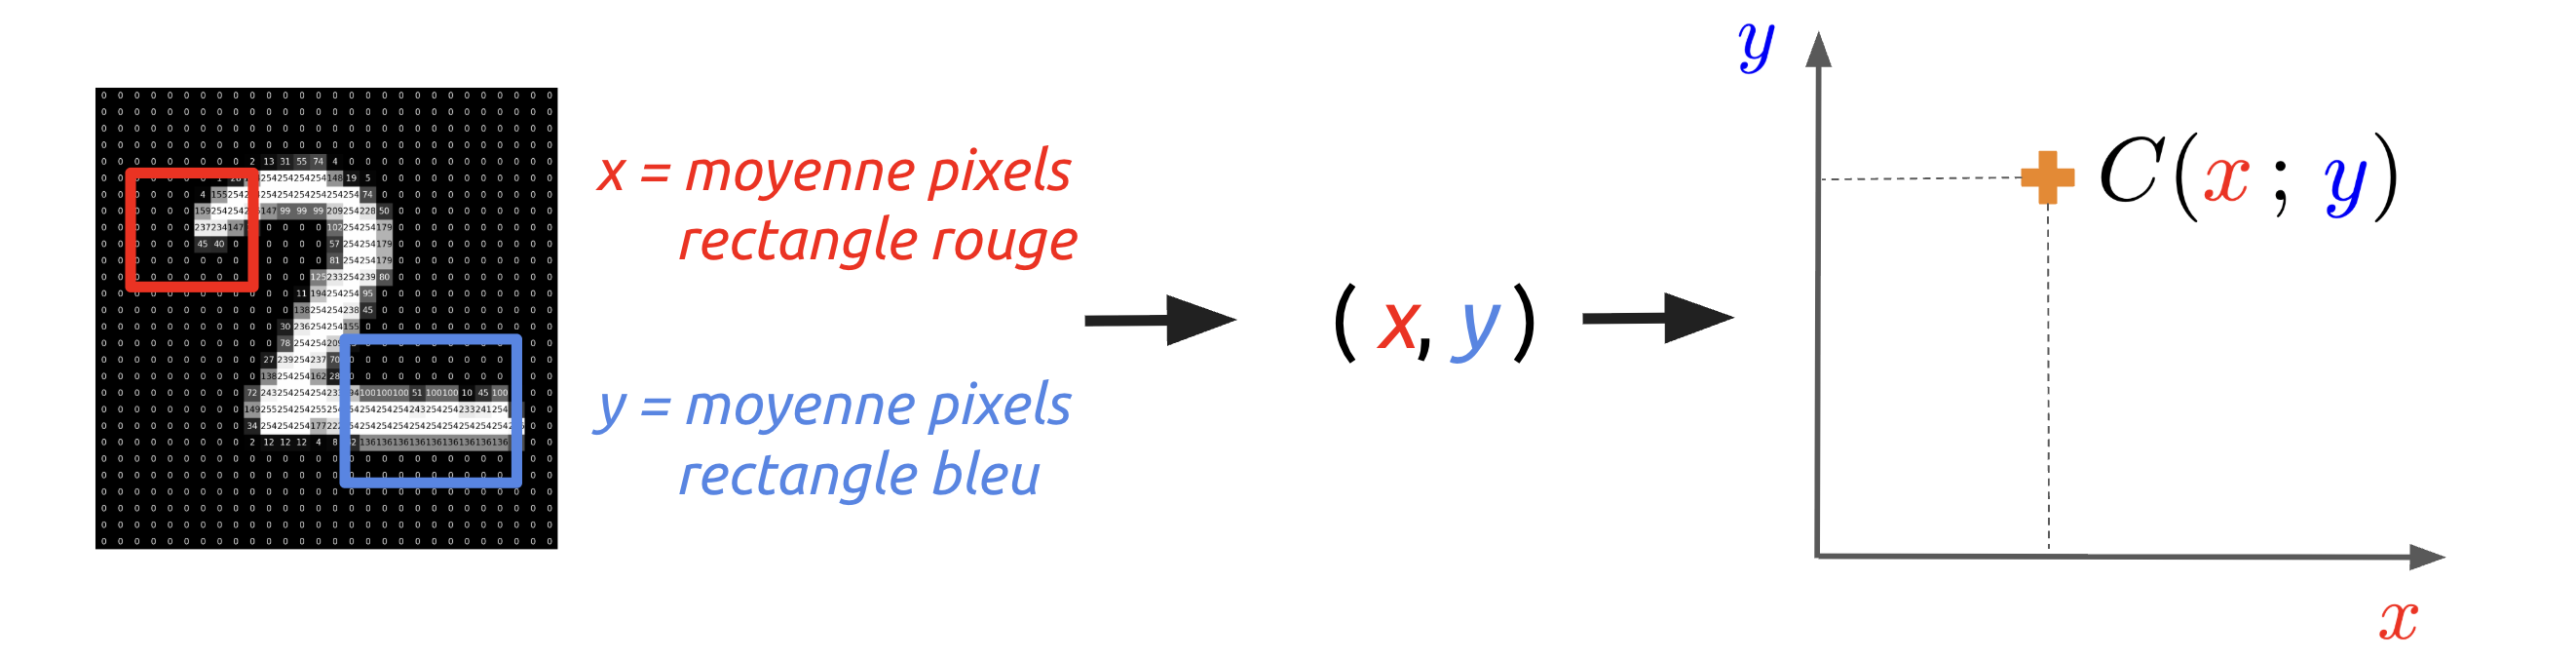

**Exécute la cellule suivante** pour poursuivre.
!!!


#### TODO changer les images de placer_2_points et adapter la validation
Reprendre les deux même images que dans exo_calcul_1_carac_rectangles.png


In [ ]:
placer_2_points()
validation_execution_placer_2_points()

!!! question 3) Place les points A et B dans le plan

On a calculé les caractéristiques de deux images. Clique sur le plan au bon endroit pour placer les points $A$ et $B$ avec leurs coordonnées.

**Exécute la cellule suivante** et place les points.
!!!


In [ ]:
validation_placer_2_points()

!!! tip Points associé aux images d'entrainement
La particuliarité d'un algorithme d'IA est d'apprendre à partir d'une liste d’images d'entraînement. On sait déjà si ces images contiennent un 2 ou un 7. 

On va calculer leur points caractéristique pour les placer dans le plan.

**Exécute la cellule suivante** pour afficher la liste d'exemples. Le tableau est interactif. 
!!!


In [ ]:
# Clique dans cette cellule de code puis appuie sur le bouton Exécuter
affichage_banque_horizontale(show_carac=True, carac=2, window=20)
validation_execution()

#### TODO : ici afficher animation avec les nuages de point des 2 puis des 7 qui apparaissent


### Estimer le chiffre d'une image grâce aux exemples d'entrainement


!!! question 4) Comment estimer le chiffre dans une nouvelle image ?
On veut estimer le chiffre écrit dans une nouvelle image. On commence par calculer ses deux caractéristiques $x$ et $y$ : 

$x = 40$ et $y = 60$

On a donc les coordonnées du point caractéristique associé à l'image : $C(40 ; 60$)

**Exécute la celulle suivante et place le point C** sur le plan. 
!!!


#### TODO l'élève place cette image inconnue dans le plan où se trouvent les nuages de points des exemples


In [ ]:
# Exécute cette cellule pour afficher la suite

exercice_image_mystere()

## C. Etape 2 : Séparer avec une droite


<div id="debut-etape-classif" style="height: 1px; visibility: hidden;"></div>


#### TODO: Revoir toute ce qui suit jusqu'à exo au dessus en dessous


### Image mystère + droite + zones
Même logique que précédemment, mais cette fois une **droite** sépare le plan et on colore les zones.
Place le point A, observe où il tombe et où se situent les 2 et les 7.


In [ ]:
exercice_image_mystere_droite()


!!! abstract Classification linéaire  
Pour faire la classification avec la droite :   
- Nous avons choisi 2 paramètres $m$ et $p$ pour définir une droite séparant les deux classes  
- Nous avons déterminé que l'algorithme devait estimer $\hat r = 2$ pour les points au dessus de la droite
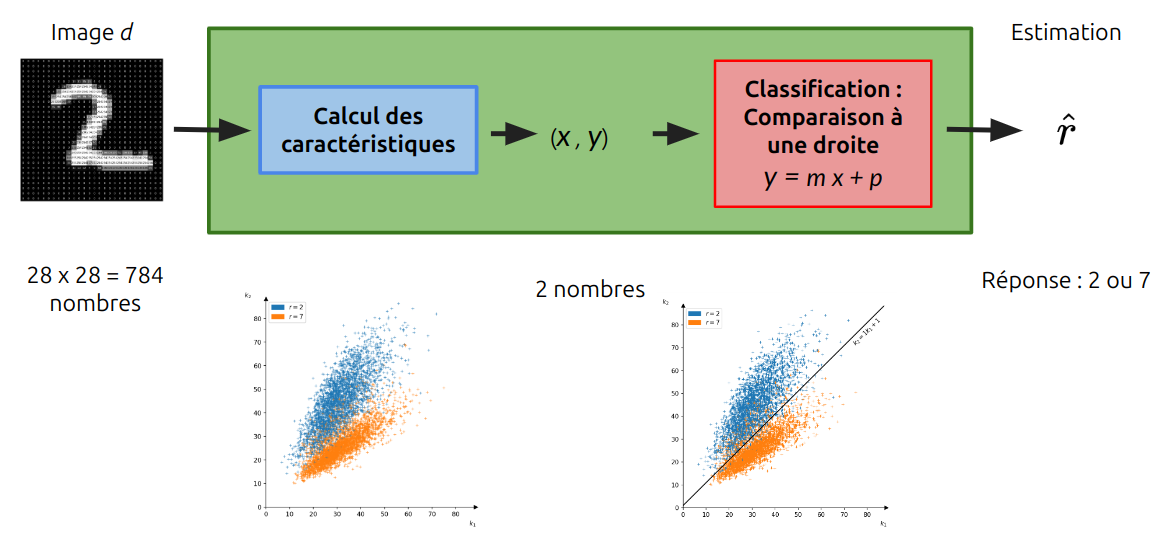  
!!!
!!! info Comment l'ordinateur fait-il pour savoir si un point est au dessus de la droite ?  
L'ordinateur ne peut pas faire de comparaison visuelle. Il doit donc faire des calculs avec les coordonnées des points et l'équation de la droite.  
**Exécute la cellule suivante** pour voir un exemple.  
!!!


In [ ]:
exercice_calcul_au_dessus()
validation_execution_point_droite()

!!! question 5) Quelles sont les coordonnées du point M ?
On cherche à savoir si le point $A$ est en-dessous ou au-dessus de la droite à partir de ses coordonnées seulement.
On introduit le point $M$ : il a la même abscisse que $A$ et il appartient à la droite.

**En utilisant l'équation de la droite**, retrouve l'ordonnée de $M$ en remplaçant $x$ et complète-la dans la cellule ci-dessous.
!!!


In [ ]:
ordonnee_M = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_equation()

!!! question 6) Quelle propriété a l'ordonnée du point M ?

**Exécute la cellule suivante**, pour répondre au QCM.
!!!


In [ ]:
qcm_dessus()

!!! abstract Un exemple de point en dessous
**Exécute la cellule suivante** pour voir un exemple avec un point en dessous de la droite.
!!!


In [ ]:
exercice_calcul_au_dessous()
validation_execution_point_droite_dessous()

!!! question 7) Quelles sont les coordonnées du point N ?
Comme dans la question précédente, on cherche à savoir si le point $B$ est en dessous ou au-dessus de la droite à partir de ses coordonnées seulement.
On introduit le point $N$ : il a la même abscisse que $B$ et il appartient à la droite.

**En utilisant l'équation de la droite**, retrouve l'ordonnée de $N$ en remplaçant $x$ et complète-la dans la cellule ci-dessous.
!!!


In [ ]:
ordonnee_N = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_equation_dessous()

!!! question 8) Quelle comparaison permet de situer un point par rapport à une droite ?
Pour savoir si un point $A(x_A, y_A)$ est au-dessus ou en-dessous d'une droite d’équation $y = m x + p$, que faut-il comparer ?

**Exécute la cellule suivante**, pour retrouver la réponse à la question parmi les choix proposés.
!!!


In [ ]:
qcm_dessus_dessous()

!!! info Algorithme pour savoir si un point est au-dessus ou en-dessous d'une droite
Pour savoir si un point $A(x_A, y_A)$ est au-dessus ou en-dessous d'une droite d’équation $y = m x + p$ on compare  $y_A$ avec $m x_A + p$. Plusieurs cas sont possibles :

1. Si $y_A$ est plus grand, le point se trouve au-dessus de la droite.
2. Si $y_A$ est égale à $m x_A + p$, le point se trouve sur la droite.
3. Si $y_A$ est plus petit, le point se trouve en-dessous de la droite.
!!!


<div id="debut-etape-apprendre" style="height: 1px; visibility: hidden;"></div>


## D. Etape 4 : Apprendre a faire moins d'erreurs


In [ ]:
tracer_20_points_droite()
validation_execution_tracer_20_points_droite()

!!! question 9) Quel est le pourcentage d'erreur sur ce schéma ?
Calcule le pourcentage d'erreur pour ces 20 images et cette droite. Les points au dessus de la droite sont classés comme 2 par l'algorithme et ceux en dessous comme 7.
**Remplace les `...`** dans la cellule suivante par ta réponse (uniquement le nombre sans le %) **puis exécute**.  
!!!


In [ ]:
erreur_20 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite_20()

!!! info Diminuer l'erreur avec l'ordonnée à l'origine de la droite
Pour réduire l'erreur on cherche à trouver une droite qui séparer mieux les deux nuages de points. On commence par changer l'ordonnée à l'origine $p$.

**Exécute la cellule suivante** pour observer comment la droite se déplace lorsque l’on modifie son ordonnée à l'origine $p$.
!!!


In [ ]:
tracer_20_points_droite_p()
validation_execution_tracer_20_points_droite_p()

!!! question 10) Quelle est l'ordonnée à l'origine de la meilleure droite ?
Déplace le curseur rouge pour trouver une droite qui donne le plus faible pourcentage d'erreur.

En regardant l'équation de la droite, **remplace les `...`** dans la cellule suivante par la valeur de l'ordonnée à l'origine $p$ (la valeur de $y$ pour $x=0$) de cette droite, **puis exécute**.
!!!


In [ ]:
p = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite_p()

!!! question 11) Comment retrouver l'ordonnée à l'origine sur le graphique ?
Observe les points d'intersection de la droite avec l'axe des abscisses et/ou l'axe des ordonnées. Peux-tu retrouver la valeur de l'ordonnée à l'origine $p$ sur le graphique ?

**Exécute la cellule suivante** pour dévoiler le QCM et répond à la question.
!!!


In [ ]:
qcm_ordonnee_origine()

!!! info Diminuer davantage l'erreur avec le coefficient directeur
Ensuite, on peut aussi faire varier le coefficient directeur $m$ pour obtenir un pourcentage d'erreur minimal.

**Exécute la cellule suivante** pour observer comment la droite se déplace lorsque l’on modifie le coefficient directeur $m$ dans l'équation $y = mx + p$.
!!!


In [ ]:
tracer_20_points_droite_pm()
validation_execution_tracer_20_points_droite_pm()

!!! question 12) Quelles sont les paramètres de la meilleure droite ?
À nouveau, cherchez la droite qui donne le meilleur pourcentage d'erreur en faisant varier les deux paramètres.

**Remplace les `...`** dans la cellule suivante par les valeurs du coefficient directeur $m$ et de l'ordonnée à l'origine $p$ pour la droite donnant le plus faible pourcentage d'erreur.
!!!


In [ ]:
m = ...
p = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite_pm()

!!! question 13) Quel est le signe du coefficient directeur ?

On a des nuages de points séparés par des droites. Déduis visuellement le signe du coefficient directeur de chaque droite et réponds au QCM suivant. (Tu peux t'aider de l'interface précédente pour retrouver le signe.)

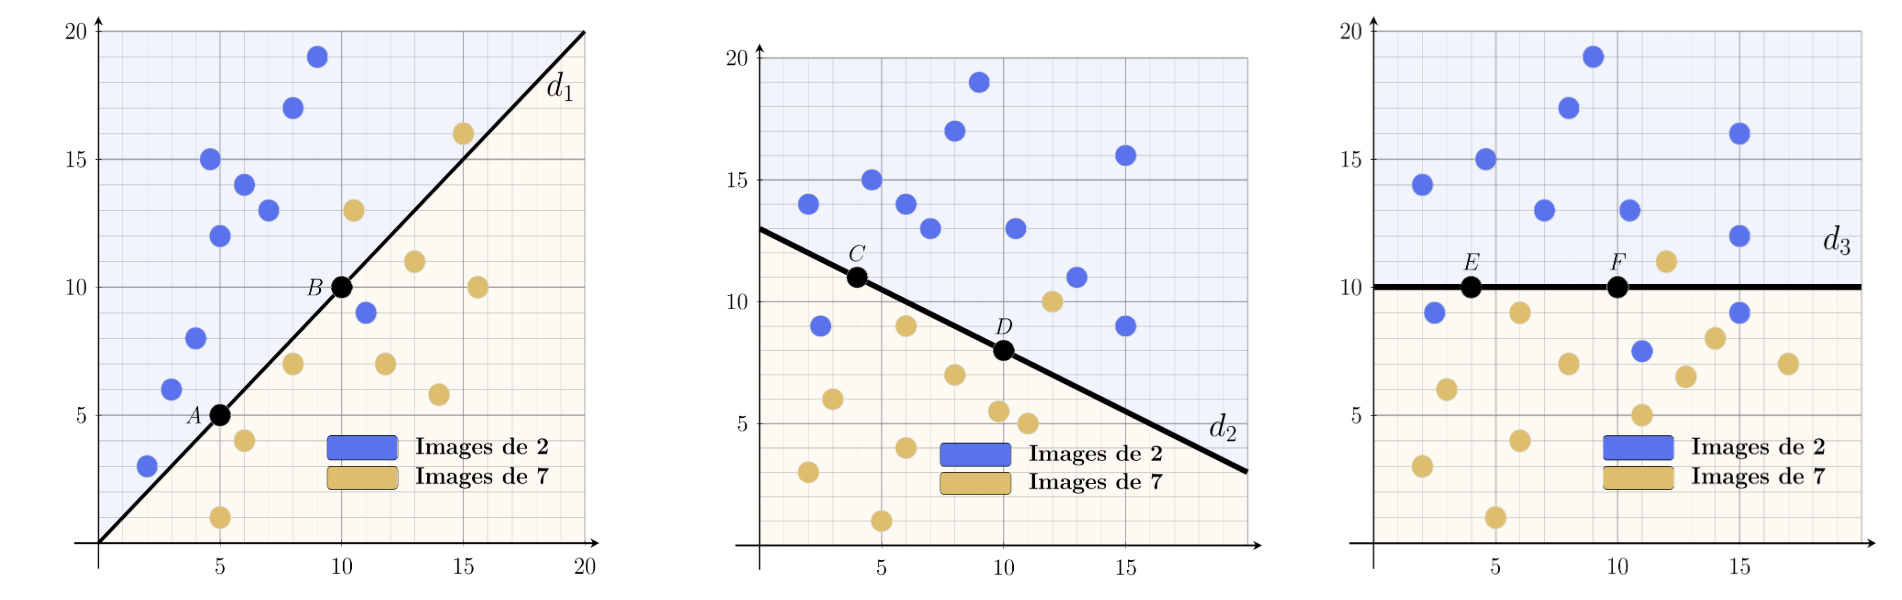

!!!


In [ ]:
qcm_association_negatif()

In [ ]:
qcm_association_positif()

In [ ]:
qcm_association_nul()

!!! info Comment l'ordinateur calcule le coefficient directeur d'une droite ?
Jusqu'à maintenant, on a fait des choix sur les droites visuellement, mais l'ordinateur peut uniquement faire des calculs. Comment fait-il ?

Par exemple, pour calculer le coefficient directeur $m$ d'une droite, il prend deux points de la droite $A(x_A; y_A)$ et $B(x_B; y_B)$ et il calcule $m$ en utilisant la formule : $$m = \frac{y_B - y_A}{x_B - x_A}.$$

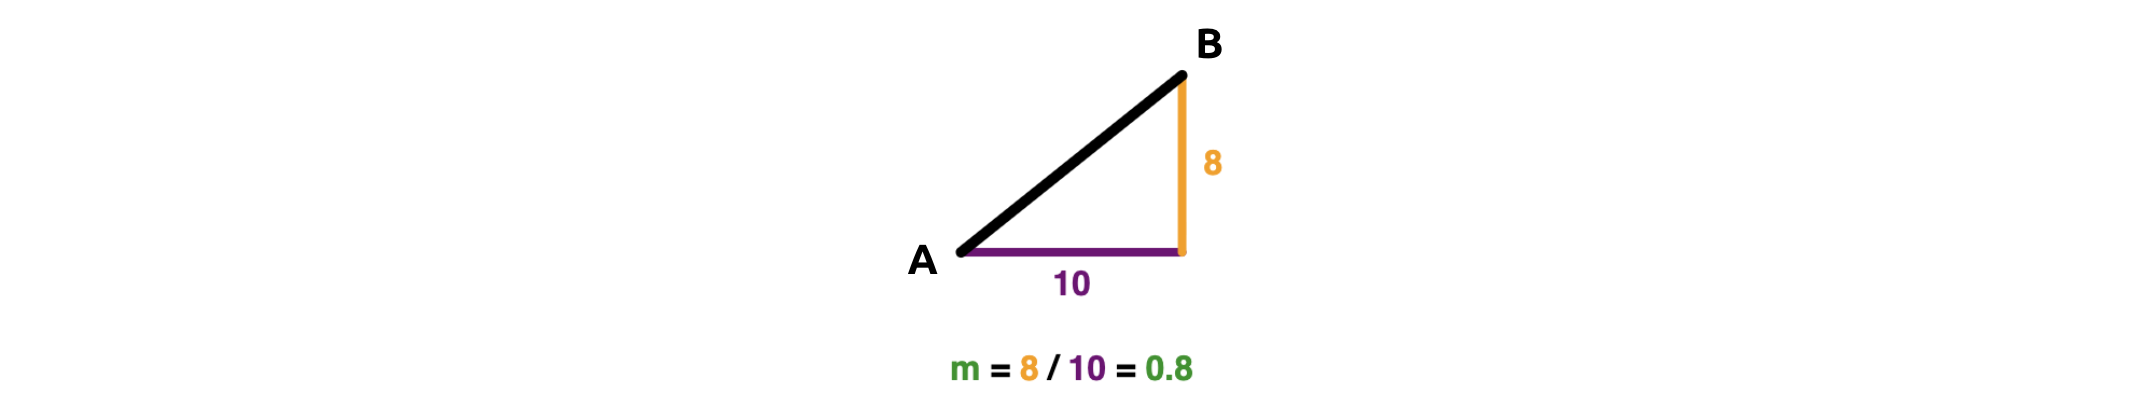

!!!


!!! question 14) Quel est le coefficient directeur de la droite ?

Détermine les coordonées de chaque paire de points et calcule pour chaque droite le coefficient directeur en utilisant la formule.

**Remplace les `...`** dans la cellule suivante avec la valeur de chaque coefficient directeur, **puis exécute**.

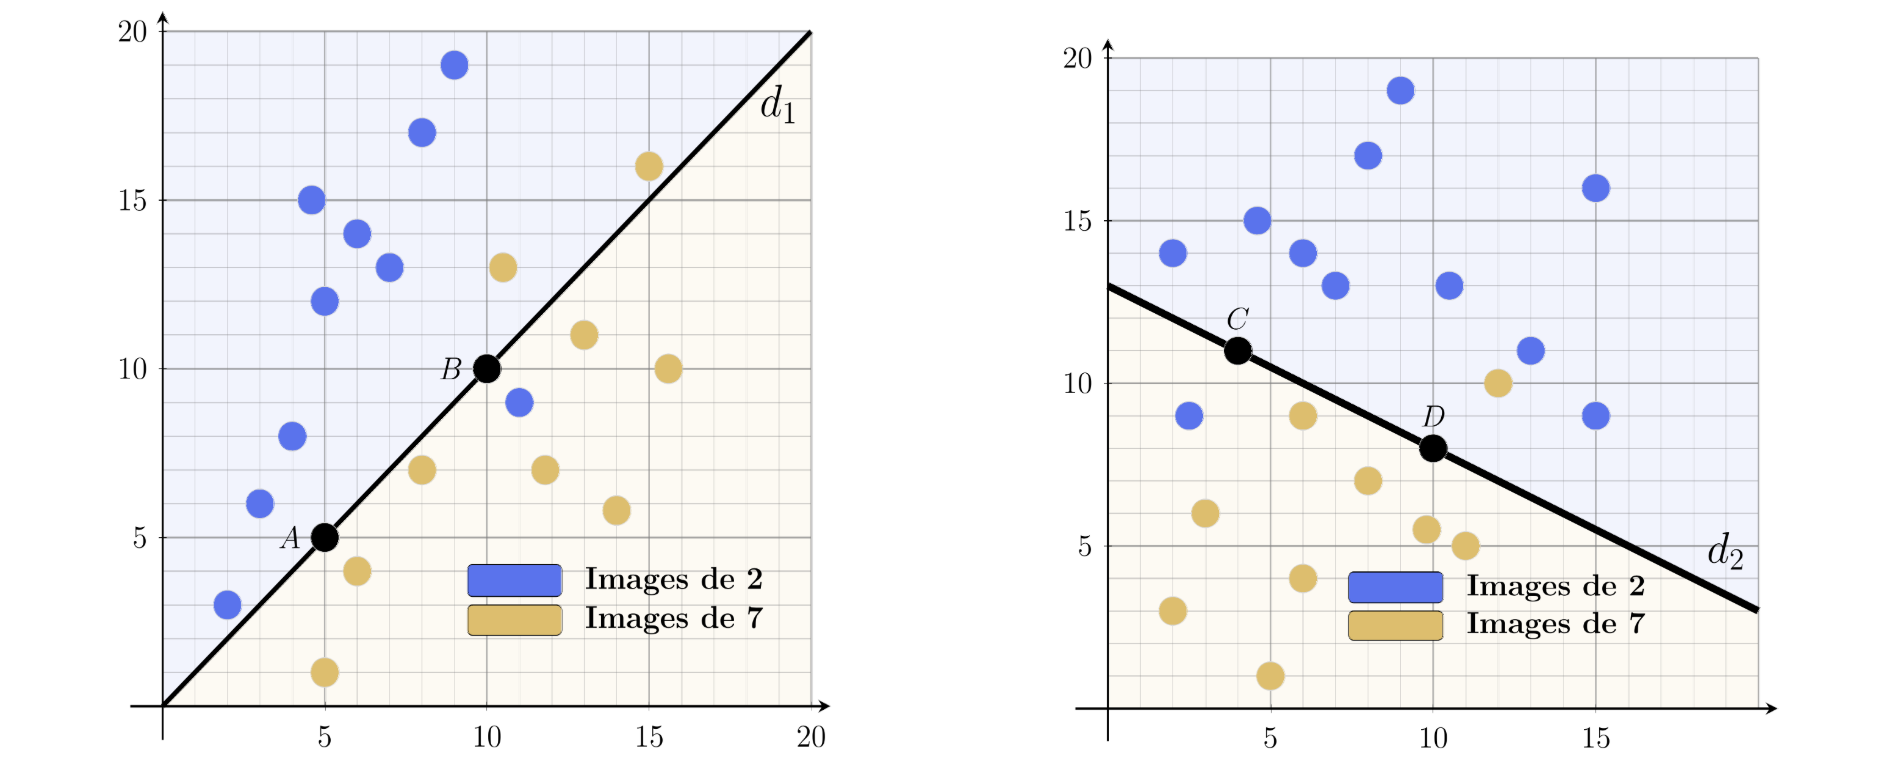

!!!


In [ ]:
# coefficient directeur de d1
m1 = ...
# coefficient directeur de d2
m2 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_pente()

### Première résolution du challege


In [ ]:
tracer_points_droite()

validation_execution_tracer_points_droite()

TODO : texte pour expliquer que l'ordinateur peut chercher tout seul


In [ ]:
grid_search_animate()


!!! question 15) Trouve une droite permettant d'obtenir moins de 8% d'erreur
Ajuste les paramètres $m$ et $p$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
Quand tu auras trouvé une bonne droite, **exécute la cellule suivante** pour passer à la suite.  
!!!


In [ ]:
calculer_score_droite(ensure_draw=True)
validation_execution_calculer_score_droite()

#### TODO: Grid search pour trouver la meilleur erreur 


#### TODO: Donner la main pour dessiner une image et donner l'erreur après (obliger l'élève a un test "custom")


<div id="debut-etape-custom" style="height: 1px; visibility: hidden;"></div>


## E. Etape 5 : Modéliser et chercher la caractéristique


!!! info Comment choisir des bonnes caractéristiques ?
Avant, on utilisait comme caractéristiques les moyennes des zones du haut et du bas de l’image. Maintenant, on va faire pareil, mais avec d’autres zones.

On choisira deux zones identiques pour toutes les images. Pour qu’elles donnent de meilleures caractéristiques, elles doivent être bien placées pour représenter la forme de nos deux chiffres.

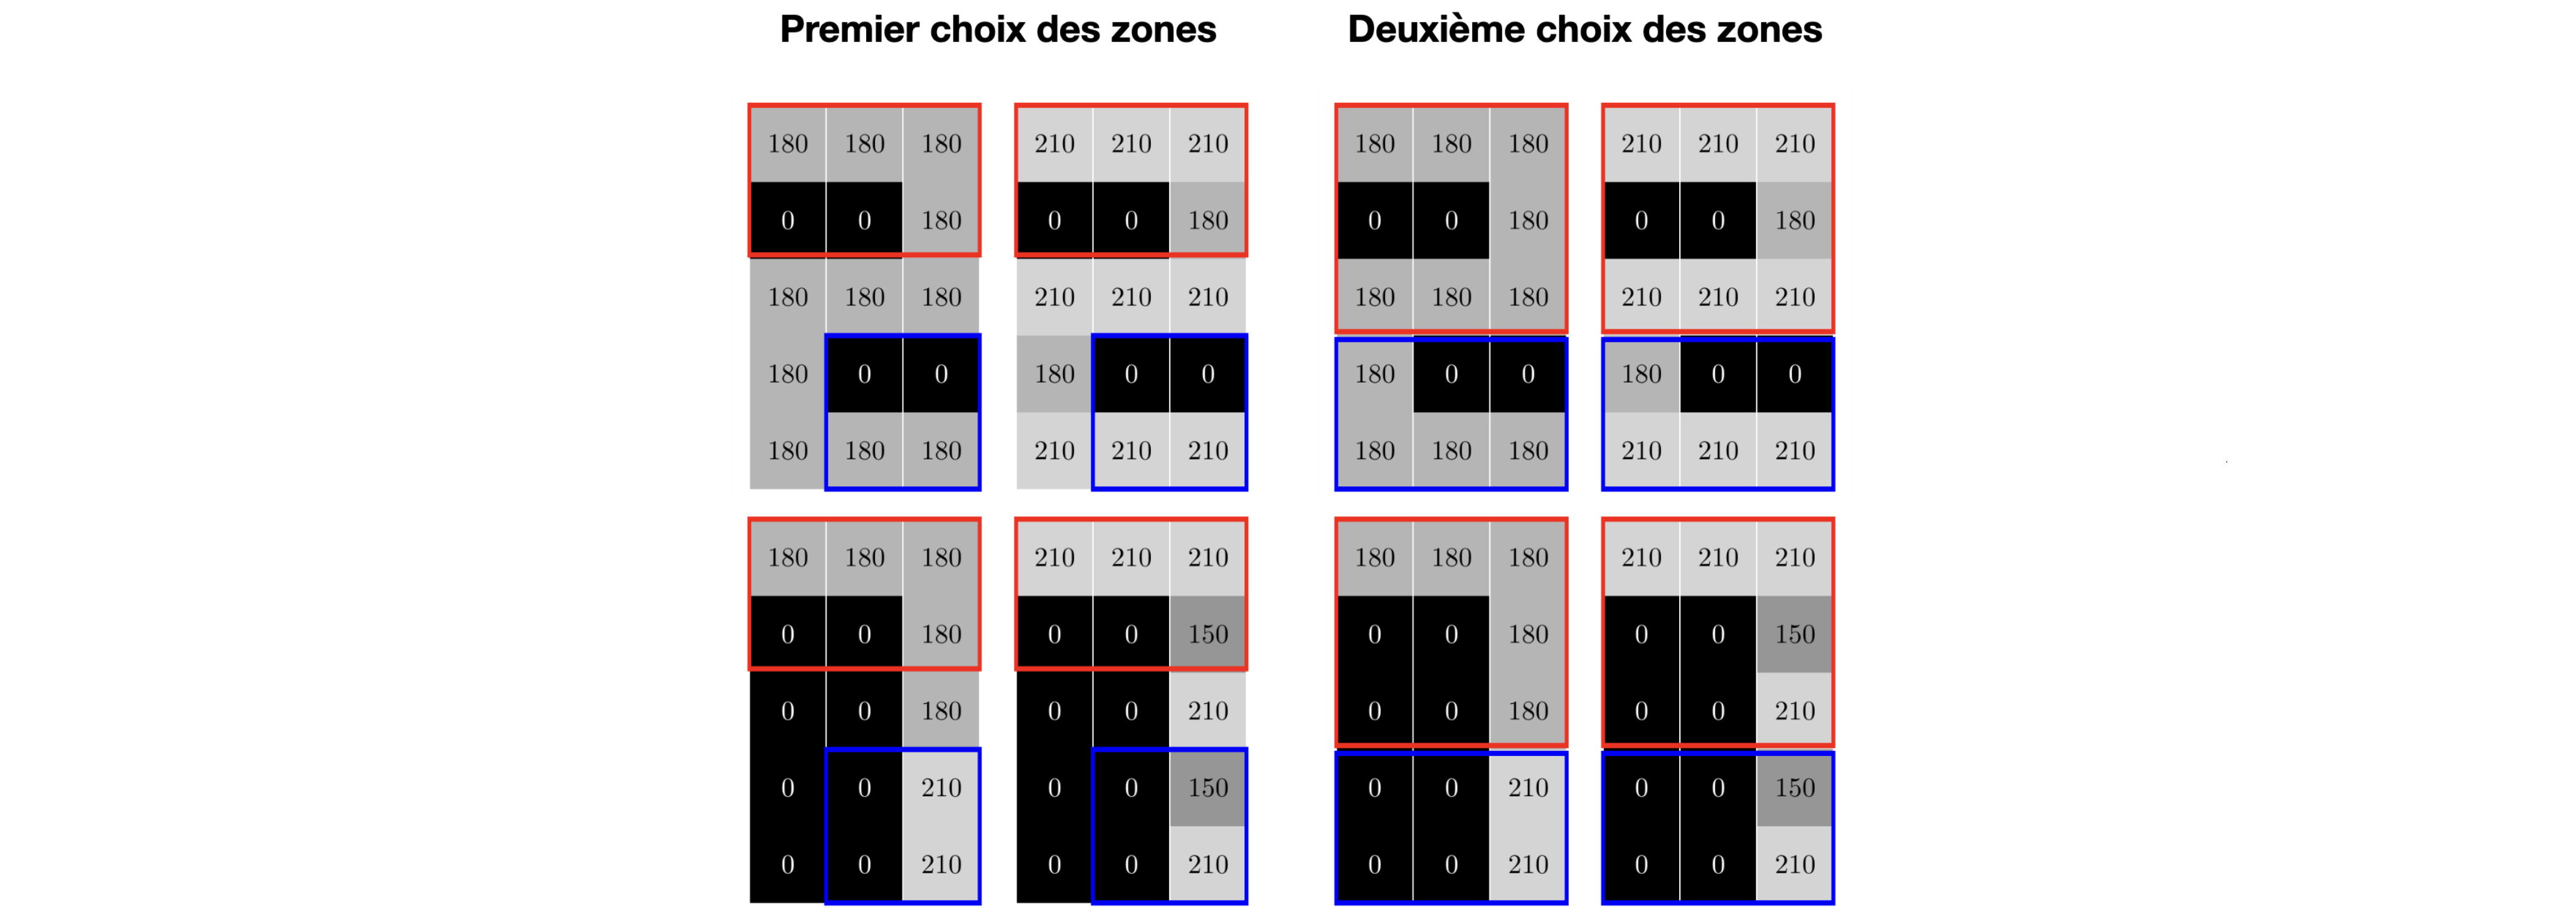

!!!

!!! question 16) Quelles zones choisir ?
Voici deux choix de zones pour différencier un 2 d’un 7. En observant les zones entourées, lequel permet le mieux de distinguer ces deux chiffres ?

Rappelle-toi : on calcule la moyenne des pixels de chaque zone pour obtenir un point par image et on cherche des nuages de points bien séparés.

**Executez la cellule suivante** pour faire ton choix dans le QCM.
!!!


In [ ]:
# EXECUTE CETTE CELLULE

qcm_choix_caracteristiques()

!!! question 17) Exemple de mauvaises caractéristiques
Dans la suite, on traite le premier choix des zones (images de gauche).

**Executez la cellule suivante** pour afficher les régions et place sur le graphique les points correspondant aux images.
!!!


In [ ]:
mauvaises_caracteristiques()

validation_execution_mauvaises_caracteristiques()

In [ ]:
validation_moyenne_carac_mauvaise()

!!! question 18) Exemple de meilleures caractéristiques
Maintenant, on traite le deuxième choix des zones (à droite).

**Executez la cellule suivante** pour afficher les nouvelles régions et place sur le graphique les points correspondant aux nouvelles caractéristiques.
!!!


In [ ]:
meilleures_caracteristiques()

validation_execution_meilleures_caracteristiques()

In [ ]:
validation_moyenne_carac_meilleure()

### Trouve tes propres caractéristiques


!!! question 19) Changer les zones choisies pour définir tes propres caractéristiques
**Exécute la cellule suivante** puis sélectionne deux zones sur l'image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Clique sur le bouton zone x ou zone y pour choisir la zone à sélectionner, puis clique sur l'image et laissez appuyé jusqu'à avoir selectionné la zone souhaitée.  
!!!


In [ ]:
afficher_customisation(enable_optimizer=True)

validation_execution_afficher_customisation()

!!! question 20) Trouve la meilleure droite.
Ajuste les paramètres de la droite pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  

**Exécute la cellule suivante** pour passer à la suite quand tu auras moins de 8% d'erreur. Il faut pour ça trouver deux bonnes zones et ajuster la droite.  
!!!


??? warning SOS : Rien ne se passe ? Clique ici

    Avec la souris sélectionne une zone dans une des images :   
    - clique sur zone 2    
    - sélectionne une zone   
    - clique sur zone 1  
    - sélectionne une zone  
      
    L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.
???


In [ ]:
calculer_score_custom_droite(ensure_draw=True)

!!! abstract Fin du Notebook  
Dans ce TP, tu as :   
  
- Utilisé deux caractéristiques pour chaque image ;  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées ;  
- Classifié en fonction de la distance par rapport aux points de référence ;  
- Ajusté les zones pour calculer les caractéristiques et ainsi optimiser la classification et minimiser ton erreur.  
  
Continue à chercher des bonnes zones pour diminuer ton pourcentage d'erreur. Tu peux faire jusqu'à moins de 3% d'erreur !  
!!!


## Bravo tu as découvert la classification avec deux caractéristiques. 
